<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">             <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>Armin Ghasemi</b><br><br>810100198</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>deep learning </b><br><br>HW_1 Q2</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>Amirhossein samoudi </b><br><br>810100108</i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
           </tr>
        </table>
    </div>
</div>


### imports

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

### part1 : Data preparation and statistical analysis

In [104]:
file_path = "ConcreteStrengthData.csv"  
df = pd.read_csv(file_path)
df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [106]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


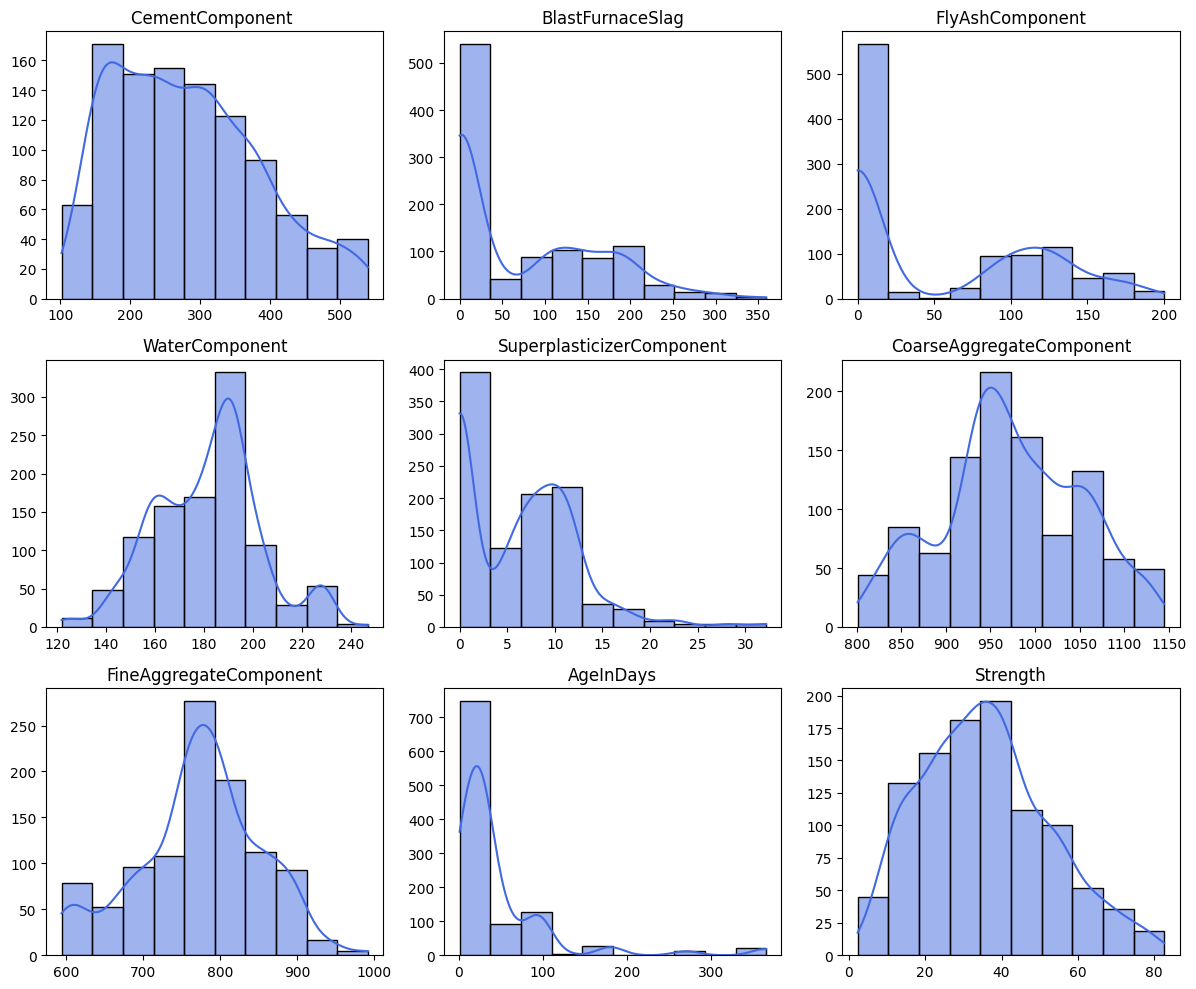

In [107]:
plt.figure(figsize=(12, 10))

rows, cols = 3, 3

for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)  
    sns.histplot(df[col], kde=True, bins=10, color='royalblue')
    plt.title(col)
    plt.xlabel('')  
    plt.ylabel('')  

plt.tight_layout() 
plt.show()


In [108]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=12)
print(f"Number of train samples {len(train_data)} & Number of test samples :  {len(test_data)}")
train_data

Number of train samples 824 & Number of test samples :  206


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
774,382.0,0.0,0.0,186.0,0.0,1111.0,784.0,7,11.47
508,424.0,22.0,132.0,178.0,8.5,882.0,750.0,3,32.01
695,116.0,173.0,0.0,192.0,0.0,909.8,891.9,28,22.35
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07
781,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,7,14.20
...,...,...,...,...,...,...,...,...,...
418,251.4,0.0,118.3,192.9,5.8,1043.6,754.3,3,11.98
473,446.0,24.0,79.0,162.0,11.6,967.0,712.0,28,51.02
49,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7,32.82
278,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,100,43.58


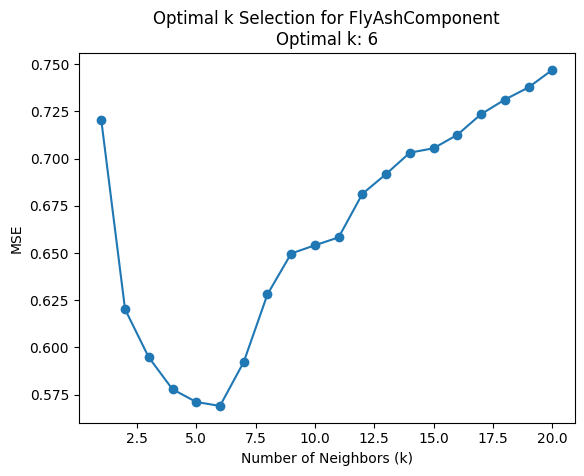

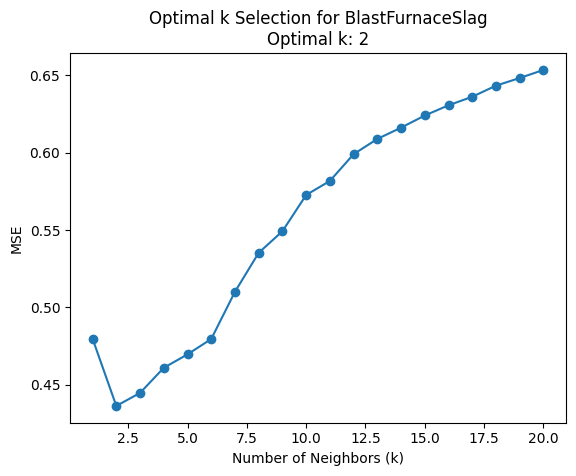

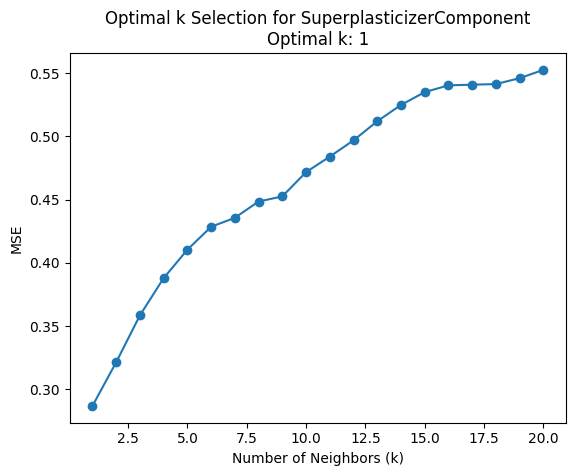

In [109]:
cols_to_impute = ['FlyAshComponent', 'BlastFurnaceSlag', 'SuperplasticizerComponent']

train_data[cols_to_impute] = train_data[cols_to_impute].replace(0, np.nan)
test_data[cols_to_impute] = test_data[cols_to_impute].replace(0, np.nan)

train_mean = train_data.mean()
train_std = train_data.std()

train_data_scaled = (train_data - train_mean) / train_std
test_data_scaled = (test_data - train_mean) / train_std

target_data_train = train_data_scaled[cols_to_impute].copy()
train_data_scaled = train_data_scaled.drop(columns=cols_to_impute)

target_data_test = test_data_scaled[cols_to_impute].copy()
test_data_scaled = test_data_scaled.drop(columns=cols_to_impute)

optimal_k_list = []

def find_optimal_k(X_train, y_train, col_name):
    k_range = range(1, 21)
    scores = []
    
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        score = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
        scores.append(-score)
    
    optimal_k = k_range[np.argmin(scores)]
    optimal_k_list.append(optimal_k)
    
    plt.plot(k_range, scores, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('MSE')
    plt.title(f'Optimal k Selection for {col_name}\nOptimal k: {optimal_k}')
    plt.show()

    return optimal_k

for col in cols_to_impute:

    y_train = target_data_train[col]
    X_train = train_data_scaled.copy()
    
    train_indices = y_train.notna()
    test_indices = y_train.isna()
    
    X_train_filled = X_train[train_indices]
    y_train_filled = y_train[train_indices]
    
    optimal_k = find_optimal_k(X_train_filled, y_train_filled, col)
    
    knn = KNeighborsRegressor(n_neighbors=optimal_k)
    knn.fit(X_train_filled, y_train_filled)
    predicted_values_train = knn.predict(X_train[test_indices])
    target_data_train.loc[test_indices, col] = predicted_values_train

    y_test = target_data_test[col]
    test_indices = y_test.isna()
    predicted_values_test = knn.predict(test_data_scaled[test_indices])
    target_data_test.loc[test_indices, col] = predicted_values_test

train_data_scaled = pd.concat([train_data_scaled, target_data_train], axis=1)
test_data_scaled = pd.concat([test_data_scaled, target_data_test], axis=1)


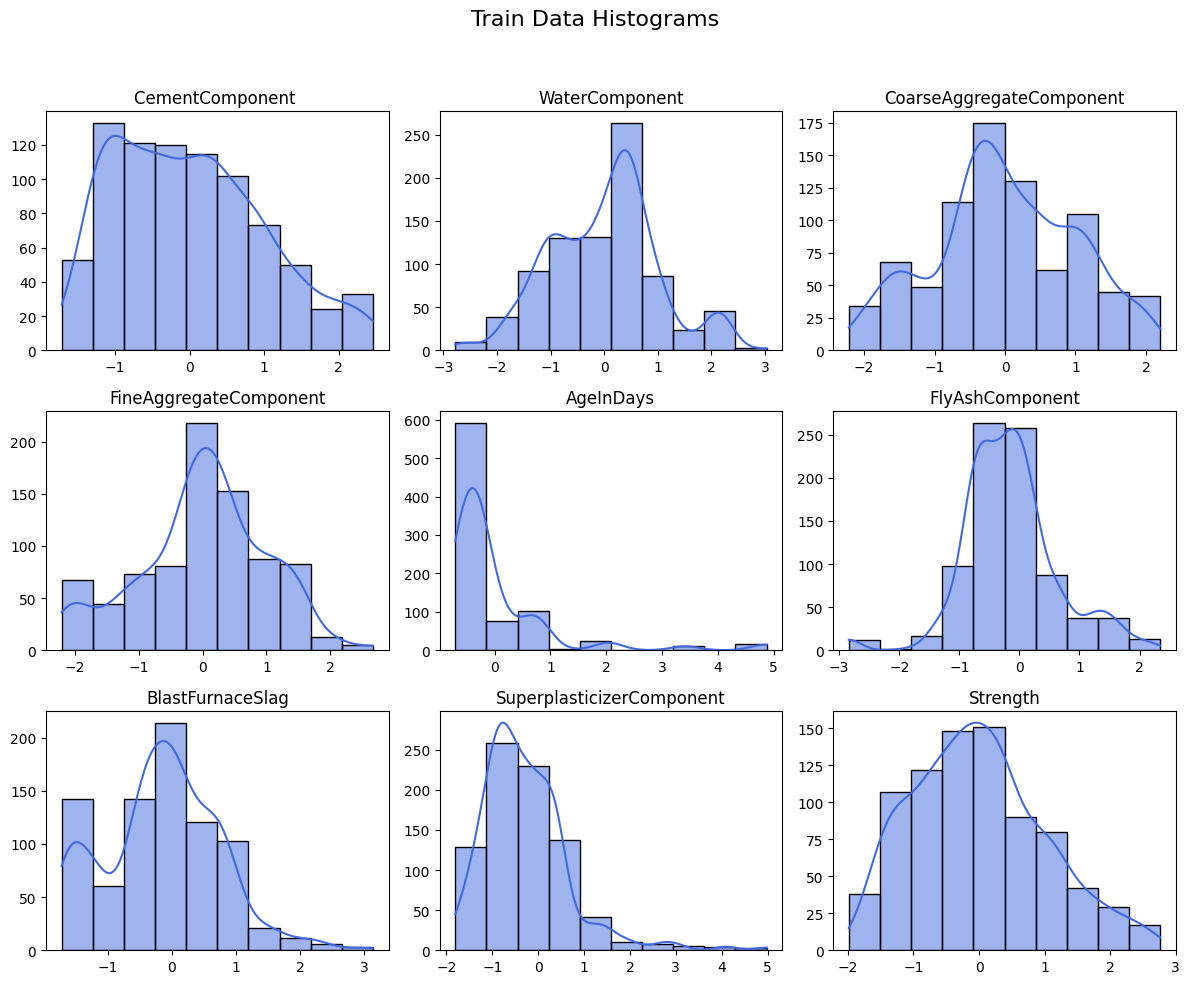

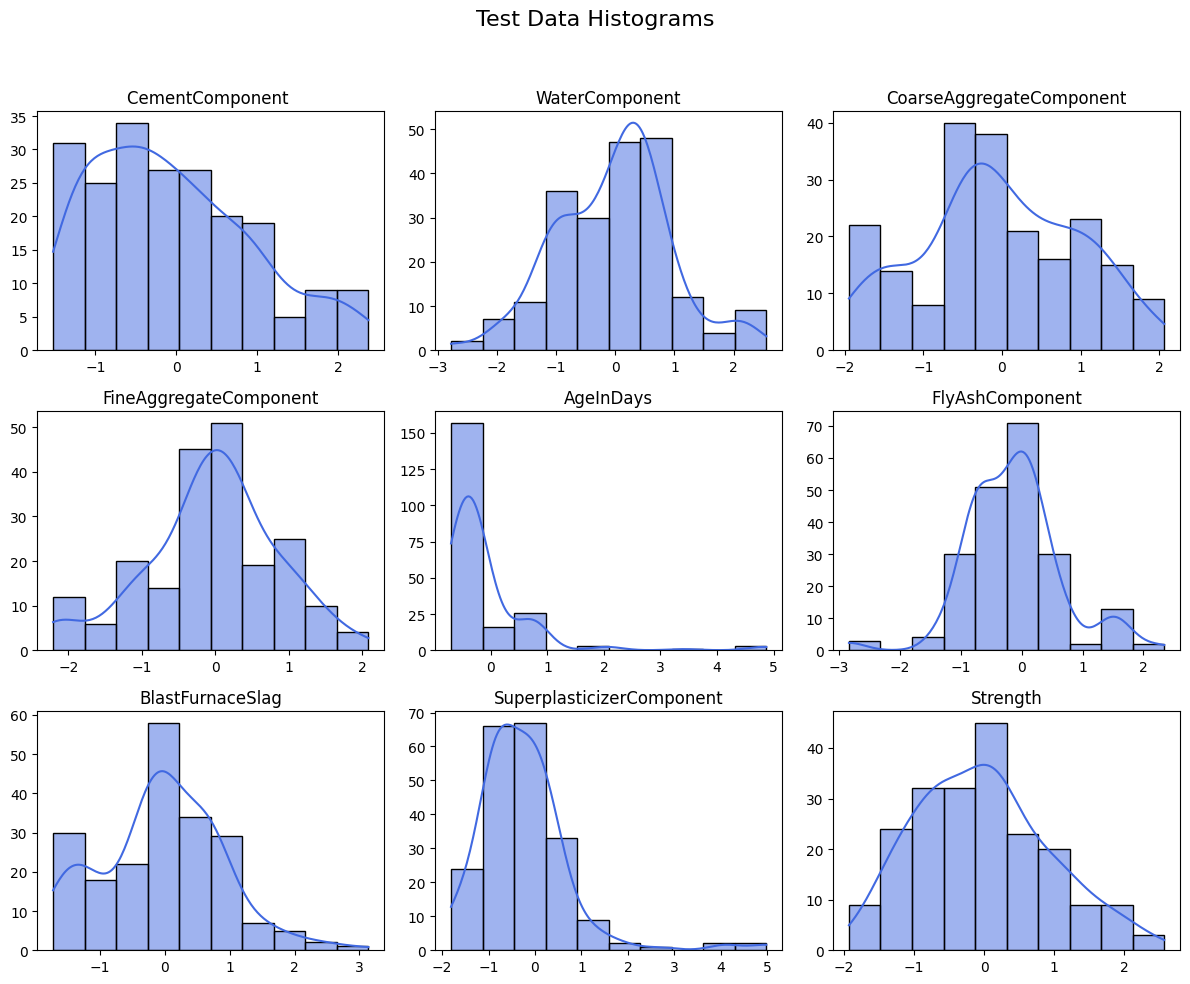

In [110]:
if 'Strength' in train_data_scaled.columns:
    train_data_scaled = train_data_scaled[[col for col in train_data_scaled.columns if col != 'Strength'] + ['Strength']]

if 'Strength' in test_data_scaled.columns:
    test_data_scaled = test_data_scaled[[col for col in test_data_scaled.columns if col != 'Strength'] + ['Strength']]

def plot_histograms(data, title):
    plt.figure(figsize=(12, 10))
    rows, cols = 3, 3
    for i, col in enumerate(data.columns):
        plt.subplot(rows, cols, i + 1)
        sns.histplot(data[col], kde=True, bins=10, color='royalblue')
        plt.title(col)
        plt.xlabel('')
        plt.ylabel('')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_histograms(train_data_scaled, 'Train Data Histograms')

plot_histograms(test_data_scaled, 'Test Data Histograms')


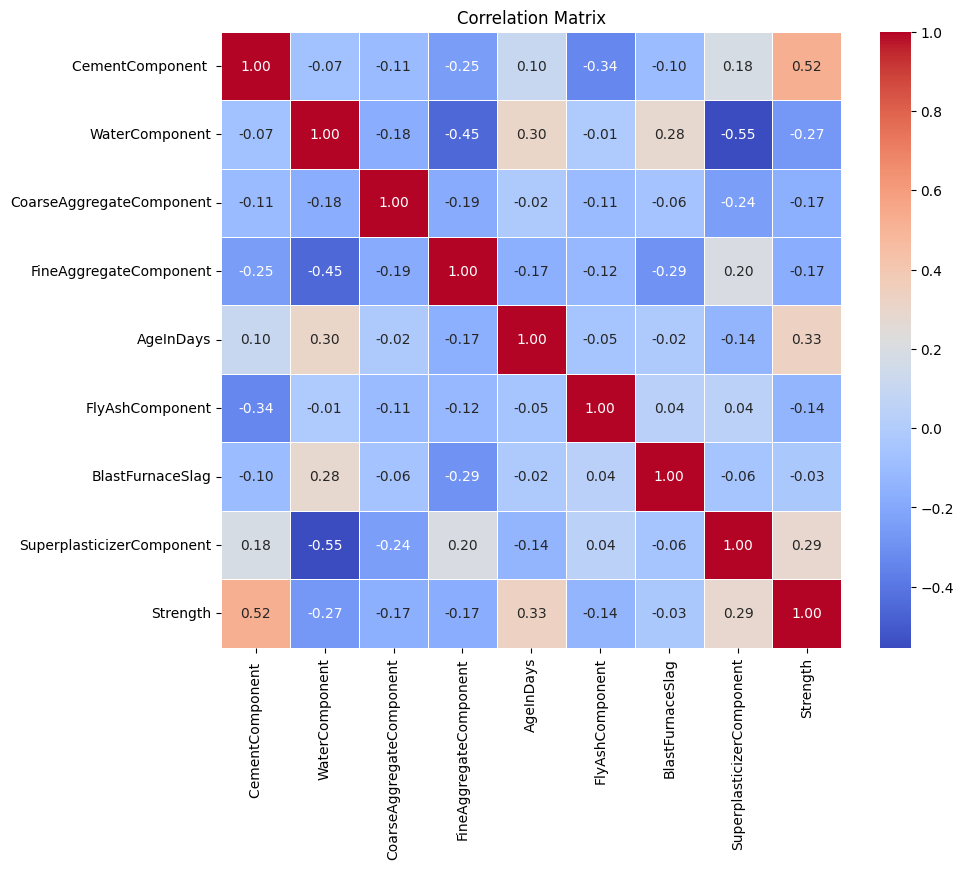

In [111]:
correlation_matrix = train_data_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


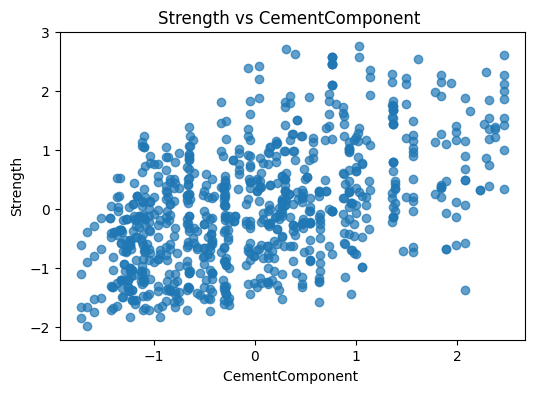

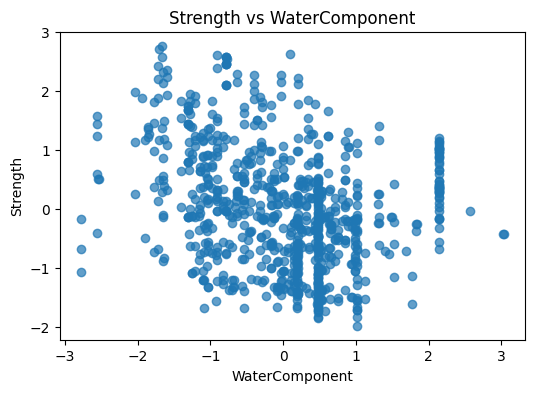

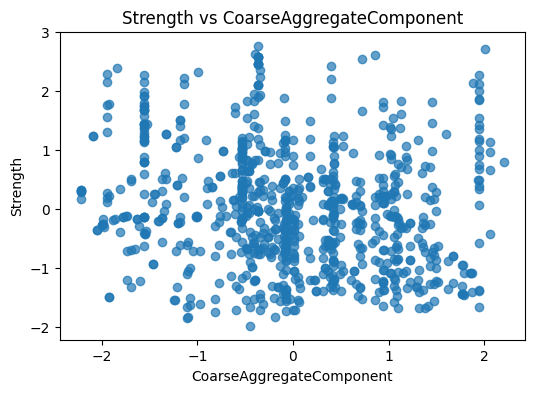

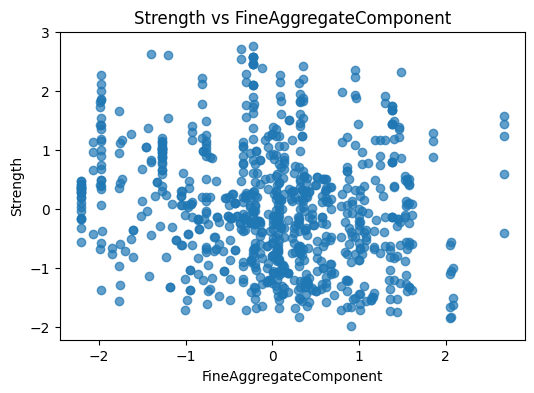

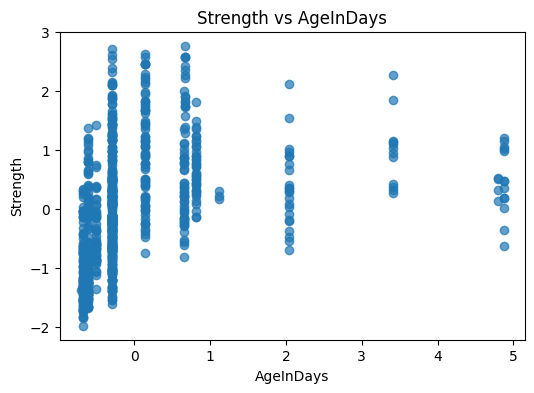

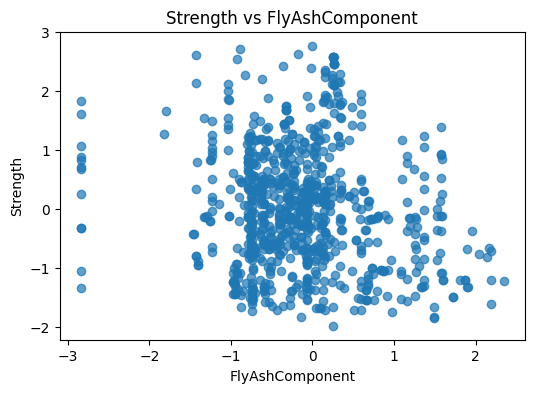

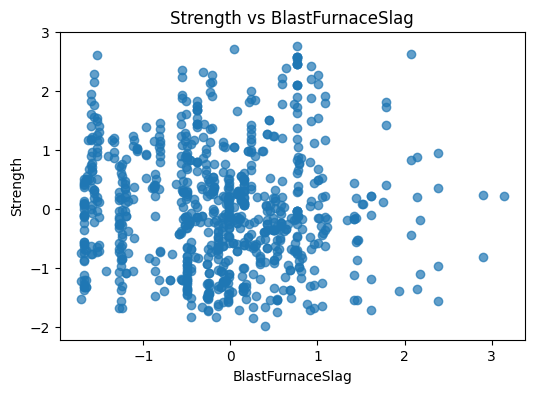

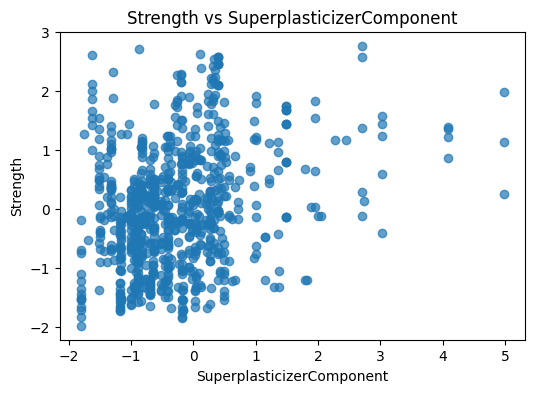

In [112]:
target_column = train_data_scaled.columns[-1]

for column in train_data_scaled.columns[:-1]:
    plt.figure(figsize=(6, 4))
    plt.scatter(train_data_scaled[column], train_data_scaled[target_column], alpha=0.7)
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.title(f'{target_column} vs {column}')
    plt.show()


### part2 : Implementation of the multilayer neural network model

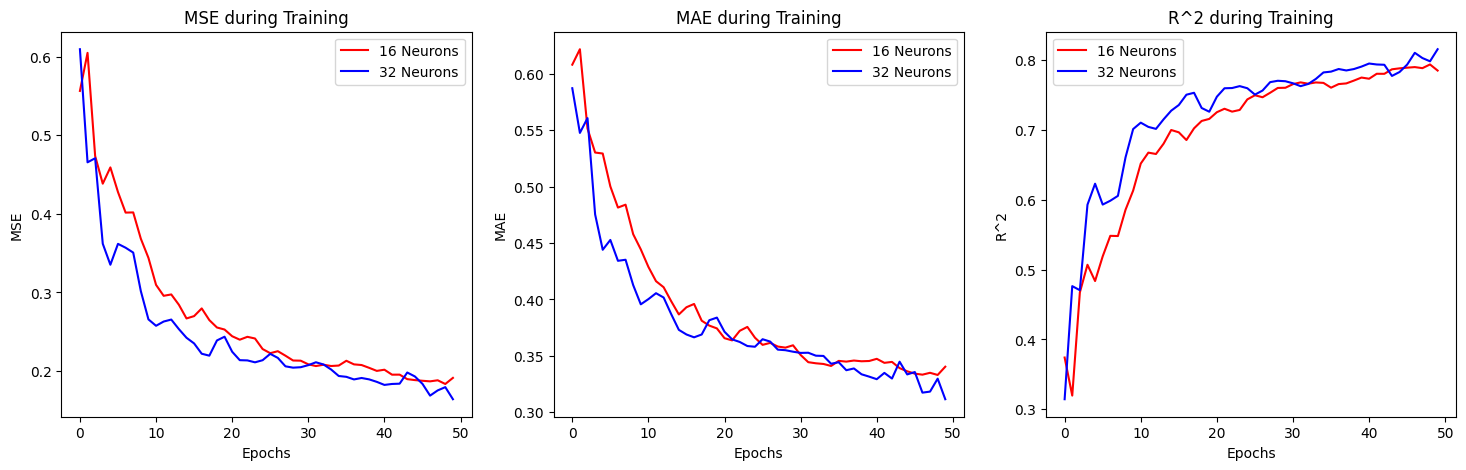

,Neurons,MSE,MAE,R^2
0,16 Neurons,0.191261,0.340414,0.784896
1,32 Neurons,0.164104,0.311596,0.815438


In [139]:
X_train = torch.tensor(train_data_scaled.iloc[:, :-1].values, dtype=torch.float32)
y_train = torch.tensor(train_data_scaled.iloc[:, -1].values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(test_data_scaled.iloc[:, :-1].values, dtype=torch.float32)
y_test = torch.tensor(test_data_scaled.iloc[:, -1].values, dtype=torch.float32).view(-1, 1)

def create_model(hidden_neurons):
    class NeuralNet(nn.Module):
        def __init__(self):
            super(NeuralNet, self).__init__()
            self.hidden = nn.Linear(X_train.shape[1], hidden_neurons)
            self.output = nn.Linear(hidden_neurons, 1)
        
        def forward(self, x):
            x = torch.relu(self.hidden(x))
            x = self.output(x)
            return x
    return NeuralNet()

def train_and_evaluate(hidden_neurons):
    model = create_model(hidden_neurons)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.1)
    
    epochs = 50
    train_mse, train_mae, train_r2 = [], [], []
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
            mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
            r2 = r2_score(y_test.numpy(), y_pred.numpy())
        
        train_mse.append(mse)
        train_mae.append(mae)
        train_r2.append(r2)
    
    return model, train_mse, train_mae, train_r2

model_16, mse_16, mae_16, r2_16 = train_and_evaluate(16)
model_32, mse_32, mae_32, r2_32 = train_and_evaluate(32)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(mse_16, label='16 Neurons', color='red')
axes[0].plot(mse_32, label='32 Neurons', color='blue')
axes[0].set_title('MSE during Training')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(mae_16, label='16 Neurons', color='red')
axes[1].plot(mae_32, label='32 Neurons', color='blue')
axes[1].set_title('MAE during Training')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MAE')
axes[1].legend()

axes[2].plot(r2_16, label='16 Neurons', color='red')
axes[2].plot(r2_32, label='32 Neurons', color='blue')
axes[2].set_title('R^2 during Training')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('R^2')
axes[2].legend()

plt.show()

def final_evaluation(model):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
        mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
        r2 = r2_score(y_test.numpy(), y_pred.numpy())
    return mse, mae, r2

mse_16_final, mae_16_final, r2_16_final = final_evaluation(model_16)
mse_32_final, mae_32_final, r2_32_final = final_evaluation(model_32)

results_df = pd.DataFrame({
    'Neurons': ['16 Neurons', '32 Neurons'],
    'MSE': [mse_16_final, mse_32_final],
    'MAE': [mae_16_final, mae_32_final],
    'R^2': [r2_16_final, r2_32_final]
})

results_df

### part3 : Check the model settings changes

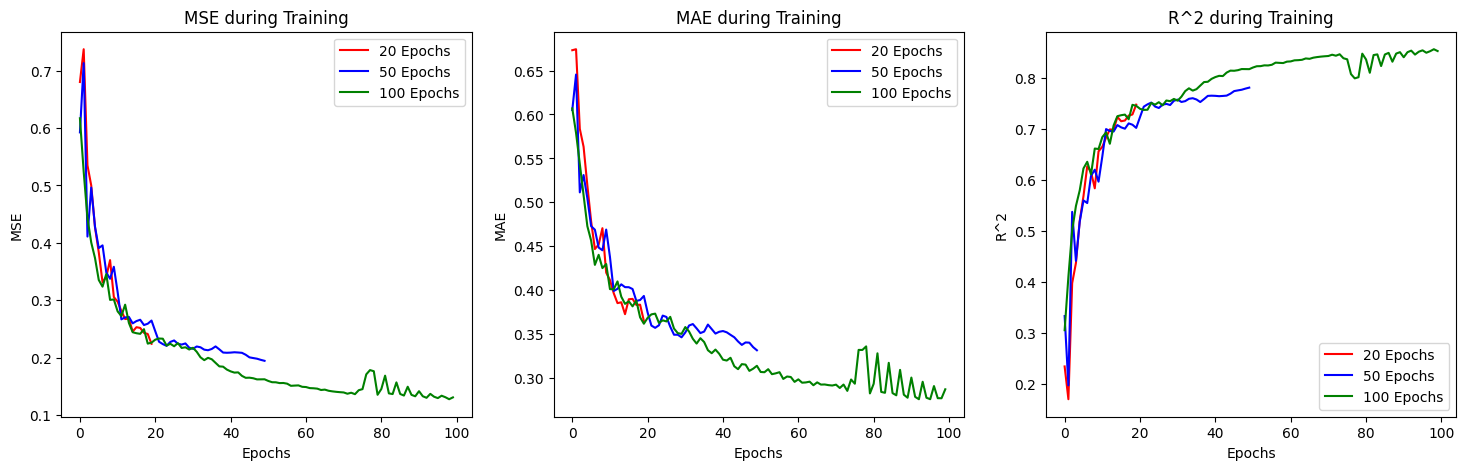

,Epochs,MSE,MAE,R^2
0,20 Epochs,0.224061,0.365096,0.748007
1,50 Epochs,0.194441,0.331605,0.781320
2,100 Epochs,0.130718,0.287195,0.852986


In [ ]:
def create_model():
    class NeuralNet(nn.Module):
        def __init__(self):
            super(NeuralNet, self).__init__()
            self.hidden = nn.Linear(X_train.shape[1], 32)  
            self.output = nn.Linear(32, 1)
        
        def forward(self, x):
            x = torch.relu(self.hidden(x))
            x = self.output(x)
            return x
    return NeuralNet()

def train_and_evaluate(epochs):
    model = create_model()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.1)
    
    train_mse, train_mae, train_r2 = [], [], []
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
            mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
            r2 = r2_score(y_test.numpy(), y_pred.numpy())
        
        train_mse.append(mse)
        train_mae.append(mae)
        train_r2.append(r2)
    
    return model, train_mse, train_mae, train_r2

model_20, mse_20, mae_20, r2_20 = train_and_evaluate(20)
model_50, mse_50, mae_50, r2_50 = train_and_evaluate(50)
model_100, mse_100, mae_100, r2_100 = train_and_evaluate(100)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(mse_20, label='20 Epochs', color='red')
axes[0].plot(mse_50, label='50 Epochs', color='blue')
axes[0].plot(mse_100, label='100 Epochs', color='green')
axes[0].set_title('MSE during Training')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(mae_20, label='20 Epochs', color='red')
axes[1].plot(mae_50, label='50 Epochs', color='blue')
axes[1].plot(mae_100, label='100 Epochs', color='green')
axes[1].set_title('MAE during Training')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MAE')
axes[1].legend()

axes[2].plot(r2_20, label='20 Epochs', color='red')
axes[2].plot(r2_50, label='50 Epochs', color='blue')
axes[2].plot(r2_100, label='100 Epochs', color='green')
axes[2].set_title('R^2 during Training')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('R^2')
axes[2].legend()

plt.show()

def final_evaluation(model):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
        mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
        r2 = r2_score(y_test.numpy(), y_pred.numpy())
    return mse, mae, r2

mse_20_final, mae_20_final, r2_20_final = final_evaluation(model_20)
mse_50_final, mae_50_final, r2_50_final = final_evaluation(model_50)
mse_100_final, mae_100_final, r2_100_final = final_evaluation(model_100)

results_df = pd.DataFrame({
    'Epochs': ['20 Epochs', '50 Epochs', '100 Epochs'],
    'MSE': [mse_20_final, mse_50_final, mse_100_final],
    'MAE': [mae_20_final, mae_50_final, mae_100_final],
    'R^2': [r2_20_final, r2_50_final, r2_100_final]
})

results_df


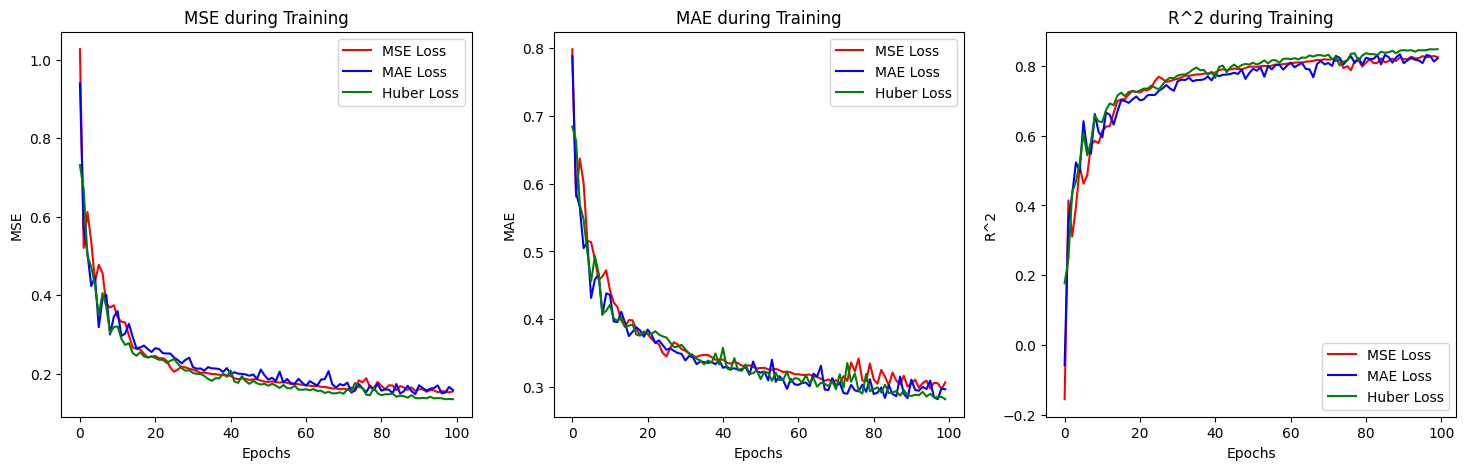

,Loss Function,MSE,MAE,R^2
0,MSE Loss,0.155398,0.306636,0.825230
1,MAE Loss,0.158602,0.296401,0.821627
2,Huber Loss,0.135335,0.281806,0.847794


In [ ]:

def create_model():
    class NeuralNet(nn.Module):
        def __init__(self):
            super(NeuralNet, self).__init__()
            self.hidden = nn.Linear(X_train.shape[1], 32)  
            self.output = nn.Linear(32, 1)
        
        def forward(self, x):
            x = torch.relu(self.hidden(x))
            x = self.output(x)
            return x
    return NeuralNet()

def train_and_evaluate(loss_function):
    model = create_model()
    optimizer = optim.Adam(model.parameters(), lr=0.1)
    
    train_mse, train_mae, train_r2 = [], [], []
    
    for epoch in range(100):  
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = loss_function(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
            mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
            r2 = r2_score(y_test.numpy(), y_pred.numpy())
        
        train_mse.append(mse)
        train_mae.append(mae)
        train_r2.append(r2)
    
    return model, train_mse, train_mae, train_r2

mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()
huber_loss = nn.SmoothL1Loss()

model_mse, mse_mse, mae_mse, r2_mse = train_and_evaluate(mse_loss)
model_mae, mse_mae, mae_mae, r2_mae = train_and_evaluate(mae_loss)
model_huber, mse_huber, mae_huber, r2_huber = train_and_evaluate(huber_loss)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(mse_mse, label='MSE Loss', color='red')
axes[0].plot(mse_mae, label='MAE Loss', color='blue')
axes[0].plot(mse_huber, label='Huber Loss', color='green')
axes[0].set_title('MSE during Training')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(mae_mse, label='MSE Loss', color='red')
axes[1].plot(mae_mae, label='MAE Loss', color='blue')
axes[1].plot(mae_huber, label='Huber Loss', color='green')
axes[1].set_title('MAE during Training')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MAE')
axes[1].legend()

axes[2].plot(r2_mse, label='MSE Loss', color='red')
axes[2].plot(r2_mae, label='MAE Loss', color='blue')
axes[2].plot(r2_huber, label='Huber Loss', color='green')
axes[2].set_title('R^2 during Training')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('R^2')
axes[2].legend()

plt.show()

def final_evaluation(model):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
        mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
        r2 = r2_score(y_test.numpy(), y_pred.numpy())
    return mse, mae, r2

mse_mse_final, mae_mse_final, r2_mse_final = final_evaluation(model_mse)
mse_mae_final, mae_mae_final, r2_mae_final = final_evaluation(model_mae)
mse_huber_final, mae_huber_final, r2_huber_final = final_evaluation(model_huber)

results_df = pd.DataFrame({
    'Loss Function': ['MSE Loss', 'MAE Loss', 'Huber Loss'],
    'MSE': [mse_mse_final, mse_mae_final, mse_huber_final],
    'MAE': [mae_mse_final, mae_mae_final, mae_huber_final],
    'R^2': [r2_mse_final, r2_mae_final, r2_huber_final]
})

results_df


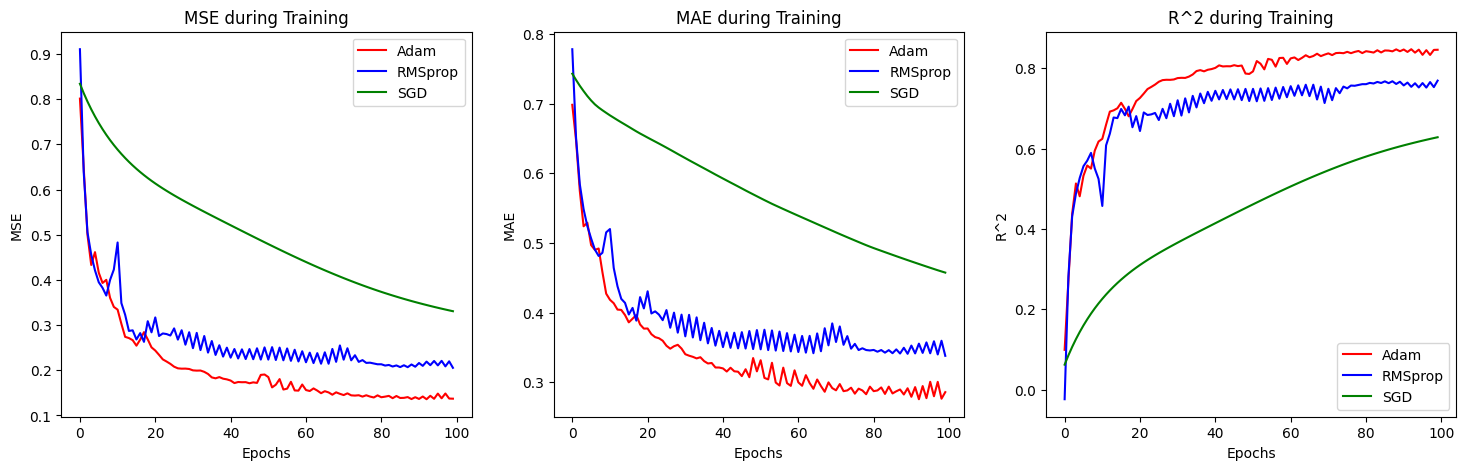

,Optimizer,MSE,MAE,R^2
0,Adam,0.137165,0.285921,0.845736
1,RMSprop,0.205464,0.338023,0.768923
2,SGD,0.330719,0.457457,0.628054


In [ ]:
def create_model():
    class NeuralNet(nn.Module):
        def __init__(self):
            super(NeuralNet, self).__init__()
            self.hidden = nn.Linear(X_train.shape[1], 32) 
            self.output = nn.Linear(32, 1)
        
        def forward(self, x):
            x = torch.relu(self.hidden(x))
            x = self.output(x)
            return x
    return NeuralNet()


def train_and_evaluate(optimizer_type):
    model = create_model()
    criterion = nn.SmoothL1Loss()  
    
    if optimizer_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.1)
    elif optimizer_type == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer_type == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.1)
    else:
        raise ValueError("Unsupported optimizer")
    
    train_mse, train_mae, train_r2 = [], [], []
    
    for epoch in range(100):  
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
            mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
            r2 = r2_score(y_test.numpy(), y_pred.numpy())
        
        train_mse.append(mse)
        train_mae.append(mae)
        train_r2.append(r2)
    
    return model, train_mse, train_mae, train_r2


model_adam, mse_adam, mae_adam, r2_adam = train_and_evaluate('Adam')
model_rmsprop, mse_rmsprop, mae_rmsprop, r2_rmsprop = train_and_evaluate('RMSprop')
model_sgd, mse_sgd, mae_sgd, r2_sgd = train_and_evaluate('SGD')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(mse_adam, label='Adam', color='red')
axes[0].plot(mse_rmsprop, label='RMSprop', color='blue')
axes[0].plot(mse_sgd, label='SGD', color='green')
axes[0].set_title('MSE during Training')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(mae_adam, label='Adam', color='red')
axes[1].plot(mae_rmsprop, label='RMSprop', color='blue')
axes[1].plot(mae_sgd, label='SGD', color='green')
axes[1].set_title('MAE during Training')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MAE')
axes[1].legend()

axes[2].plot(r2_adam, label='Adam', color='red')
axes[2].plot(r2_rmsprop, label='RMSprop', color='blue')
axes[2].plot(r2_sgd, label='SGD', color='green')
axes[2].set_title('R^2 during Training')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('R^2')
axes[2].legend()

plt.show()

def final_evaluation(model):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
        mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
        r2 = r2_score(y_test.numpy(), y_pred.numpy())
    return mse, mae, r2

mse_adam_final, mae_adam_final, r2_adam_final = final_evaluation(model_adam)
mse_rmsprop_final, mae_rmsprop_final, r2_rmsprop_final = final_evaluation(model_rmsprop)
mse_sgd_final, mae_sgd_final, r2_sgd_final = final_evaluation(model_sgd)

results_df = pd.DataFrame({
    'Optimizer': ['Adam', 'RMSprop', 'SGD'],
    'MSE': [mse_adam_final, mse_rmsprop_final, mse_sgd_final],
    'MAE': [mae_adam_final, mae_rmsprop_final, mae_sgd_final],
    'R^2': [r2_adam_final, r2_rmsprop_final, r2_sgd_final]
})

results_df